# Electric Car-Sharing Data Analysis in April 2018 (9 days period)

## Data Preview (Understanding)

In [157]:
#Importing the necessary libraries
#pandas library
import pandas as pd

#numpy library
import numpy as np


In [168]:
#Preview the csv file
f = 'Autolib_dataset.csv'
df = pd.read_csv(f)
df.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


## Checking general information of the dataset



In [169]:
#accessing information on the dataset. This is a visual inspection of sorts.
#one can already not that they're null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [170]:
#general statistics
df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


## Data Preparation & Cleaning

### Validity of the data

In [171]:
df.tail(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [172]:
#dropping irrelevant data
df.drop(['Address', 'Cars', 'Charge Slots', 'Charging Status', 'Displayed comment', 'Kind', 'Geo point',
         'Rental status', 'Scheduled at', 'Slots', 'Station type', 'Status', 'Subscription status'], axis=1, inplace=True)
df.tail(2)

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Public name,year,month,day,hour,minute
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,94120,Fontenay-Sous-Bois/Val de Fontenay/2,2018,4,4,17,27
4999,4,0,0,Paris,paris-henrybrisson-5,75018,Paris/Henry Brisson/5,2018,4,8,10,2


In [173]:
#reset the index

df.reset_index(drop=True)
df.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Public name,year,month,day,hour,minute
0,0,0,0,Paris,paris-suffren-2,75015,Paris/Suffren/2,2018,4,8,11,43
1,6,0,0,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,2018,4,6,7,24
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,Le Bourget/John Fitzgerald Kennedy/2,2018,4,3,20,14
3,3,1,0,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,2018,4,4,4,37
4,3,0,0,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,2018,4,8,17,23


In [174]:
#Using the str.strip function on the column name to strip any leading and trailing spaces  

df['City'] = df['City'].str.strip()
df['ID'] = df['ID'].str.strip()
df['Public name'] = df['Public name'].str.strip()
# Displaying the resulting dataframe
df.head(5)

#checking for errors/anomalies in records
df['ID'].unique()
df['Public name'].unique()

array(['Paris/Suffren/2', 'Paris/Raymond Losserand/145',
       'Le Bourget/John Fitzgerald Kennedy/2', ...,
       'Paris/VercingÃ©torix/106', 'Nanterre/National/134',
       'Paris/SÃ©rurier/54'], dtype=object)

### Accuracy of the data

In [175]:
#checking that the data is within April 2018 and the hour and mins make sense
#Year check
df[df['year'] != 2018]

#month check
df[df['month'] != 4]

#day check 
df[(df['day'] < 0) | (df['day'] > 10)]

#hour check 
df[(df['hour'] < 0) | (df['hour'] > 24)]

#min check 
df[(df['minute'] < 0) | (df['minute'] > 59)]

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Postal code,Public name,year,month,day,hour,minute


### Completeness of the data

In [176]:
#check for any missing values(by column)
df.isnull().values.any() 

False

### Consistency of the data

In [301]:
#checking for duplicated data
df[df.duplicated()]

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,year,month,day,hour,minute,date_time


### Uniformity of the data

In [267]:
#standardizing column names

df.columns = df.columns.str.strip().str.lower()
df.head(2)

#add underscore instead of spaces
df.columns=df.columns.str.replace(" ",'_')
df.head(2)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,year,month,day,hour,minute,date_time
0,0,0,0,Paris,paris-suffren-2,75015,Paris/Suffren/2,2018,04,08,11,43,2018-04-08 11:04:03
1,6,0,0,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,2018,04,06,07,24,2018-04-06 07:02:04


In [179]:
df['postal_code'].unique()

array([75015, 75014, 93350, 75013, 75017, 75011, 92000, 75009, 75005,
       92800, 92260, 78150, 92150, 78000, 92240, 75007, 75010, 92130,
       75006, 75018, 75004, 75020, 92210, 92310, 95870, 94130, 75016,
       94000, 94800, 92500, 75012, 92390, 75003, 93100, 75019, 94220,
       92400, 92600, 92380, 75001, 93700, 92250, 91370, 93150, 75002,
       92170, 75008, 95880, 92330, 92300, 92100, 92290, 93500, 92190,
       92230, 94300, 94150, 92700, 94120, 93110, 92340, 94230, 94700,
       91570, 94140, 94500, 93600, 93200, 92350, 93310, 92140, 92220,
       92270, 78280, 93170, 92420, 94450, 94410, 93230, 78140, 94110,
       75116, 93400, 92360, 92410, 95100, 93130, 94160, 92200, 93390,
       93370, 92160, 93800, 92320, 91330, 93440, 94340, 93360, 92110,
       75112, 92120, 94370, 92370, 91400, 93260, 94100, 93300])

In [402]:
#date time column

import datetime

#adding leading zeros for month, day, hour,min
  #month
df['month'] = df['month'].apply(lambda x: '{0:0>2}'.format(x))
df.head(3)

  #day
df['day'] = df['day'].apply(lambda x: '{0:0>2}'.format(x))
df.head(3)

  #hour
df['hour'] = df['hour'].apply(lambda x: '{0:0>2}'.format(x))
df.head(3)

  #min
df['minute'] = df['minute'].apply(lambda x: '{0:0>2}'.format(x))
df.head(3)

#combining date and time into 1 column
df['date_time'] = (df['year'].astype(str)+ df['month'].astype(str) + df['day'].astype(str)+df['hour'].astype(str)+ df['minute'].astype(str))
df.head(2)

#converting to datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y%m%d%H%M%S')
df.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,year,month,day,hour,minute,date_time
0,0,0,0,Paris,paris-suffren-2,75015,Paris/Suffren/2,2018,04,08,11,43,2018-04-08 11:04:03
1,6,0,0,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,2018,04,06,07,24,2018-04-06 07:02:04
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,Le Bourget/John Fitzgerald Kennedy/2,2018,04,03,20,14,2018-04-03 20:01:04
3,3,1,0,Paris,paris-eugeneoudine-51,75013,Paris/EugÃ¨ne OudinÃ©/51,2018,04,04,04,37,2018-04-04 04:03:07
4,3,0,0,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,2018,04,08,17,23,2018-04-08 17:02:03


### Checking for outliers in the data

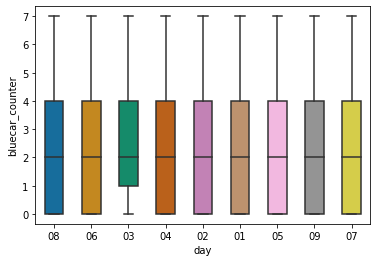

In [403]:
#visual inspection of the spread of the data for any outliers
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns
sns.boxplot(y='bluecar_counter', x='day', data=df, width=0.5, palette="colorblind")

## Data Analysis

In [404]:
#aggregating the records to hourly in each postal code, date_time and station
#set the date_time as the index column
dd = df.set_index('date_time').sort_index()
dd

#groupby and aggregate hourly
us = dd.groupby(['postal_code', 'id']).rolling('H').mean()
us.head()



bluecar_counter  ...    year
postal_code id                    date_time                             ...        
75001       paris-amiralcoligny-2 2018-04-04 08:03:04              0.0  ...  2018.0
                                  2018-04-08 22:01:05              0.0  ...  2018.0
                                  2018-04-09 18:05:04              3.0  ...  2018.0
            paris-bertinpoiree-14 2018-04-02 01:03:08              0.0  ...  2018.0
                                  2018-04-02 17:01:03              0.0  ...  2018.0

[5 rows x 5 columns]

### Most Popular Hour of Pick Up

In [405]:
# creating an activity checker

for i in us.postal_code:
  us['activity'] = us['bluecar_counter'].diff()
us.head()
us.fillna(0, inplace=True)
us.head()

bluecar_counter  ...  activity
postal_code id                    date_time                             ...          
75001       paris-amiralcoligny-2 2018-04-04 08:03:04              0.0  ...       0.0
                                  2018-04-08 22:01:05              0.0  ...       0.0
                                  2018-04-09 18:05:04              3.0  ...       3.0
            paris-bertinpoiree-14 2018-04-02 01:03:08              0.0  ...      -3.0
                                  2018-04-02 17:01:03              0.0  ...       0.0

[5 rows x 6 columns]

In [406]:
#peak picking up  time reflected by negative values(cars leaving stations)
peak_time = us.groupby(['date_time'])['activity'].sum()
peak_time.sort_values(ascending = True).head(1)

date_time
2018-04-04 15:05:07   -13.0
Name: activity, dtype: float64

### Most Popular Hour for Returning Cars

In [407]:
#peak returning hour reflected by positive values(cars returned stations)
return_time = us.groupby(['date_time'])['activity'].sum()
return_time.sort_values(ascending = False).head(1)

date_time
2018-04-02 10:04:03    11.0
Name: activity, dtype: float64

### Most Popular Station

Overall

In [408]:
#popular station in general
#getting absolute sum of activity column

pop_st = us.groupby('id').activity.apply(lambda x: np.sum(np.abs(x)))
pop_st.sort_values(ascending = False).head(1)

id
paris-portedemontrouge-8    41.0
Name: activity, dtype: float64

During Peak Hour

In [409]:
#checking which station
pop_st = us.groupby(['date_time'])['activity'].sum()
pop_st.sort_values(ascending = True).head(1)

match_timestamp = "2018-04-02 10:04:03"
popst = df.loc[df.date_time == match_timestamp]
popst
popst[popst['id'] == 'paris-portedemontrouge-8']
#the most popular station during peak hour is not the same as generally


,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,year,month,day,hour,minute,date_time


### Most Popular Postcode for Picking up

Generally

In [412]:
#renaming the postal code column so as to be able to reference it
us.rename(columns = {'postal_code':'code'}, inplace = True) 
us

bluecar_counter  ...  activity
postal_code id                         date_time                             ...          
75001       paris-amiralcoligny-2      2018-04-04 08:03:04              0.0  ...       0.0
                                       2018-04-08 22:01:05              0.0  ...       0.0
                                       2018-04-09 18:05:04              3.0  ...       3.0
            paris-bertinpoiree-14      2018-04-02 01:03:08              0.0  ...      -3.0
                                       2018-04-02 17:01:03              0.0  ...       0.0
...                                                                     ...  ...       ...
95880       enghienlesbains-arrivee-19 2018-04-08 22:01:03              0.0  ...      -2.0
            enghienlesbains-coussaye-2 2018-04-03 11:01:08              2.0  ...       2.0
                                       2018-04-03 12:01:05              2.0  ...       0.0
                                       2018-04-06 01:05:05              5.0  ...       3.0
                                       2018-04-08 16:00:09              6.0  ...       1.0

[5000 rows x 6 columns]

In [420]:
#postcode most popular for pickups (higest negatives)
post_pick = us.groupby(['code'])['activity'].sum()
post_pick.sort_values(ascending = True).head(2)

#counterchecking
us[us['code'] == 93500]
#the most popular post code is 93500

code
91570.0   -6.0
93500.0   -6.0
Name: activity, dtype: float64

During Peak Hour

In [428]:
#checking postcode
match_timestamp = "2018-04-02 10:04:03"
popc = df.loc[df.date_time == match_timestamp]
popc
popc[popc['postal_code'] == '93500']

#the most popular post code during peak hour is not the same as generally

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,postal_code,public_name,year,month,day,hour,minute,date_time


### Utilib and Utilib 1.4

Most Popular Hour of Pick Up

In [430]:
# creating an activity checker for utilib and utilib 1.4
#utilib
for i in us.code:
  us['activity_u'] = us['utilib_counter'].diff()
us.head()
us.fillna(0, inplace=True)
us.head()

#utilib1.4
for i in us.code:
  us['activity_u14'] = us['utilib_1.4_counter'].diff()
us.head()
us.fillna(0, inplace=True)
us.head()

bluecar_counter  ...  activity_u14
postal_code id                    date_time                             ...              
75001       paris-amiralcoligny-2 2018-04-04 08:03:04              0.0  ...           0.0
                                  2018-04-08 22:01:05              0.0  ...           0.0
                                  2018-04-09 18:05:04              3.0  ...           0.0
            paris-bertinpoiree-14 2018-04-02 01:03:08              0.0  ...           0.0
                                  2018-04-02 17:01:03              0.0  ...           0.0

[5 rows x 8 columns]

In [433]:
#peak picking up  time reflected by negative values(cars leaving stations)
#utilib
u_time = us.groupby(['date_time'])['activity_u'].sum()
u_time.sort_values(ascending = True).head(1)

date_time
2018-04-08 20:01:02   -2.0
Name: activity_u, dtype: float64

In [435]:
#peak picking up  time reflected by negative values(cars leaving stations)
#utilib1.4
u14_time = us.groupby(['date_time'])['activity_u14'].sum()
u14_time.sort_values(ascending = True).head(1)

date_time
2018-04-06 22:00:05   -3.0
Name: activity_u14, dtype: float64

Most Popular Hour for Returning Cars

In [437]:
#utilib
ureturn_time = us.groupby(['date_time'])['activity_u'].sum()
ureturn_time.sort_values(ascending = False).head(1)

date_time
2018-04-02 07:05:02    2.0
Name: activity_u, dtype: float64

In [438]:
#utilib 1.4
u14return_time = us.groupby(['date_time'])['activity_u14'].sum()
u14return_time.sort_values(ascending = False).head(1)

date_time
2018-04-06 13:05:05    3.0
Name: activity_u14, dtype: float64

Most Popular Station

In [436]:
#popular station in general
#getting absolute sum of activity column
#utilib
u_st = us.groupby('id').activity_u.apply(lambda x: np.sum(np.abs(x)))
u_st.sort_values(ascending = False).head(1)

id
paris-hericart-54    6.0
Name: activity_u, dtype: float64

In [439]:
#popular station in general
#getting absolute sum of activity column
#utilib1.4
u14_st = us.groupby('id').activity_u14.apply(lambda x: np.sum(np.abs(x)))
u14_st.sort_values(ascending = False).head(1)

id
sevres-granderue-123    9.0
Name: activity_u14, dtype: float64

Most Popular Postcode for Picking up

In [447]:
#postcode most popular for pickups (higest negatives)
#tilib
upost_pick = us.groupby(['code'])['activity_u'].sum()
upost_pick.sort_values(ascending = True).head(3)

#counterchecking
us[us['code'] == 92250]
#the most popular post code is 92250

code
92370.0   -1.0
92250.0   -1.0
93170.0   -1.0
Name: activity_u, dtype: float64

In [451]:
#postcode most popular for pickups (higest negatives)
#utilib 1.4
u14post_pick = us.groupby(['code'])['activity_u14'].sum()
u14post_pick.sort_values(ascending = True).head(1)

#counterchecking
#us[us['code'] == 92320]
#the most popular post code is 93500

code
92320.0   -2.0
Name: activity_u14, dtype: float64